<a href="https://colab.research.google.com/github/Mathilde-YG/DAS-course/blob/main/%EB%8D%B0%EC%9D%B4%ED%84%B0_EDA_%EC%8B%A4%EC%8A%B5_%EC%BD%94%EB%93%9C_0623.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 서울시 마포구 따릉이 데이터 Train Data를 가지고 배운내용을 토대로 통계적 EDA 해보기


1) 기초 EDA 후 추가적으로 어떤 분석을 하면 좋을지 생각해보기
- 시간대별로 대여수가 많은 시간대
- 같은 시간대에 날씨(비내림 유무, 습도)와 대여수와의 상관 관계
- 미세먼지 농도와 대여수와의 관계

2) 정리하기 - 1차원 데이터 분석으로 얻은 인사이트 정리하기

3) 생각해보기 - 시간의 따른 따릉이 대여수를 예측한것을 어떻게 활용할 수 있을까?
- 따릉이 배치 시간대 조정하여 효율적인 배치 및 활용 가능
- 날씨에 따라 따릉이 수리/보수 기간 및 일자 유동적 조정 가능


4) 생각해보기 - 더 있었으면 좋은 공공 데이터는 어떤것이 있을까?

In [ ]:
# 모듈 불러오기
import random
import pandas as pd
import numpy as np

In [ ]:
# csv 파일 읽어오기
bike = pd.read_csv('train.csv')

In [ ]:
# 데이터 크기 확인
bike.shape

In [ ]:
# 데이터 확인
bike.describe()

,id,hour,hour_bef_temperature,hour_bef_precipitation,hour_bef_windspeed,hour_bef_humidity,hour_bef_visibility,hour_bef_ozone,hour_bef_pm10,hour_bef_pm2.5,count
count,1459.000000,1459.000000,1457.000000,1457.000000,1450.000000,1457.000000,1457.000000,1383.000000,1369.000000,1342.000000,1459.000000
mean,1105.914325,11.493489,16.717433,0.031572,2.479034,52.231297,1405.216884,0.039149,57.168736,30.327124,108.563400
std,631.338681,6.922790,5.239150,0.174917,1.378265,20.370387,583.131708,0.019509,31.771019,14.713252,82.631733
min,3.000000,0.000000,3.100000,0.000000,0.000000,7.000000,78.000000,0.003000,9.000000,8.000000,1.000000
25%,555.500000,5.500000,12.800000,0.000000,1.400000,36.000000,879.000000,0.025500,36.000000,20.000000,37.000000
50%,1115.000000,11.000000,16.600000,0.000000,2.300000,51.000000,1577.000000,0.039000,51.000000,26.000000,96.000000
75%,1651.000000,17.500000,20.100000,0.000000,3.400000,69.000000,1994.000000,0.052000,69.000000,37.000000,150.000000
max,2179.000000,23.000000,30.000000,1.000000,8.000000,99.000000,2000.000000,0.125000,269.000000,90.000000,431.000000


In [ ]:
# 데이터 head 확인
bike.head()

,id,hour,hour_bef_temperature,hour_bef_precipitation,hour_bef_windspeed,hour_bef_humidity,hour_bef_visibility,hour_bef_ozone,hour_bef_pm10,hour_bef_pm2.5,count
0,3,20,16.3,1.0,1.5,89.0,576.0,0.027,76.0,33.0,49.0
1,6,13,20.1,0.0,1.4,48.0,916.0,0.042,73.0,40.0,159.0
2,7,6,13.9,0.0,0.7,79.0,1382.0,0.033,32.0,19.0,26.0
3,8,23,8.1,0.0,2.7,54.0,946.0,0.040,75.0,64.0,57.0
4,9,18,29.5,0.0,4.8,7.0,2000.0,0.057,27.0,11.0,431.0


In [ ]:
# 따릉이 대여시간대 구하기
time = np.array(bike['hour'])
time

array([20, 13,  6, ...,  5, 21, 17])

In [ ]:
# 시간에 따른 따릉이 대여수
c_bike = np.array(bike['count'])
c_bike

array([ 49., 159.,  26., ...,  22., 216., 170.])

In [ ]:
# 대여시간대 dataframe만들기
time_df = pd.DataFrame({'hour': time},
                       index=pd.Index(bike.index, name='count_id'))

In [ ]:
time_df

,hour
count_id,
0,20
1,13
2,6
3,23
4,18
...,...
1454,4
1455,3
1456,5


In [ ]:
# 시간에 따른 따릉이 대여 수 dataframe만들기
c_bike_df = pd.DataFrame({'count': c_bike},
                       index=pd.Index(bike.index, name='count_id'))

In [ ]:
c_bike_df

,count
count_id,
0,49.0
1,159.0
2,26.0
3,57.0
4,431.0
...,...
1454,21.0
1455,20.0
1456,22.0


## 평균값 산출

In [ ]:
# 시간에 따른 따릉이 대여 수 평균
avg = round(sum(c_bike) / len(c_bike), 2)

In [ ]:
avg

108.56

In [ ]:
# numpy 함수로 계산해보기
round(np.mean(c_bike),2)

108.56

## 중앙값

In [ ]:
np.median(c_bike)

96.0

## 최빈값 산출

In [ ]:
pd.Series(c_bike).mode()

0    15.0
dtype: float64

## 편차 구하기

In [ ]:
deviation = c_bike - avg
deviation

array([-59.56,  50.44, -82.56, ..., -86.56, 107.44,  61.44])

In [ ]:
c_bike_df

,count
count_id,
0,49.0
1,159.0
2,26.0
3,57.0
4,431.0
...,...
1454,21.0
1455,20.0
1456,22.0


In [ ]:
# 편차를 데이터 프레임에 추가하기
summary_df = c_bike_df.copy()
summary_df['deviation'] = deviation
summary_df

,count,deviation
count_id,,
0,49.0,-59.56
1,159.0,50.44
2,26.0,-82.56
3,57.0,-51.56
4,431.0,322.44
...,...,...
1454,21.0,-87.56
1455,20.0,-88.56
1456,22.0,-86.56


In [ ]:
summary_df.mean()

count        108.5634
deviation      0.0034
dtype: float64

## 분산

In [ ]:
np.mean(deviation **2)

6823.323442357781

In [ ]:
np.var(c_bike)

6823.323430800577

In [ ]:
# summary_df에 편차 제곱을 추가

summary_df['square of deviation'] = np.square(deviation)
summary_df

,count,deviation,square of deviation
count_id,,,
0,49.0,-59.56,3547.3936
1,159.0,50.44,2544.1936
2,26.0,-82.56,6816.1536
3,57.0,-51.56,2658.4336
4,431.0,322.44,103967.5536
...,...,...,...
1454,21.0,-87.56,7666.7536
1455,20.0,-88.56,7842.8736
1456,22.0,-86.56,7492.6336


In [ ]:
# 분산 산출

summary_df.mean()

count                   108.563400
deviation                 0.003400
square of deviation    6823.323442
dtype: float64

## 표준편차

In [ ]:
np.std(c_bike, ddof = 0)

82.60341052765665

## 범위

In [ ]:
np.max(c_bike) - np.min(c_bike)

430.0

In [ ]:
scores_Q1 = np.percentile(c_bike,25)
scores_Q3 = np.percentile(c_bike,75)
scores_IQR = scores_Q3 - scores_Q1
scores_IQR

113.0

In [ ]:
pd.Series(c_bike).describe()

count    1459.000000
mean      108.563400
std        82.631733
min         1.000000
25%        37.000000
50%        96.000000
75%       150.000000
max       431.000000
dtype: float64

# 데이터 정규화
## 표준화

In [ ]:
stand_data = (c_bike - np.mean(c_bike))/ np.std(c_bike)
stand_data

array([-0.72107676,  0.61058738, -0.99951563, ..., -1.04793978,
        1.30063153,  0.7437538 ])

In [ ]:
np.std(stand_data, ddof=0)

0.9999999999999998

## groupby로 시간대별로 데이터 묶어주기

In [ ]:
# 시간대별 평균수치
b = bike.groupby('hour').mean()
b

,id,hour_bef_temperature,hour_bef_precipitation,hour_bef_windspeed,hour_bef_humidity,hour_bef_visibility,hour_bef_ozone,hour_bef_pm10,hour_bef_pm2.5,count
hour,,,,,,,,,,
0,1200.016667,14.788136,0.016949,1.965517,58.169492,1434.220339,0.033763,55.881356,30.982759,71.766667
1,1074.918033,14.155738,0.049180,1.836667,60.459016,1400.852459,NaN,NaN,NaN,47.606557
2,1077.885246,13.747541,0.049180,1.633333,61.721311,1374.278689,0.030492,58.475410,31.366667,31.409836
3,1146.704918,13.357377,0.032787,1.620000,63.131148,1326.311475,0.031213,59.180328,31.466667,21.377049
4,1194.786885,13.001639,0.016393,1.409836,64.573770,1264.606557,0.031984,58.278689,32.116667,13.524590
5,1091.819672,12.673770,0.016393,1.296721,66.000000,1203.426230,0.031623,56.721311,31.525424,13.114754
6,1112.393443,12.377049,0.016393,1.331148,67.409836,1146.229508,0.029317,56.150000,31.603448,24.557377
7,1086.262295,12.191803,0.016393,1.262295,67.934426,1150.311475,0.025300,56.533333,31.779661,62.360656
8,1086.491803,12.600000,0.032787,1.632787,64.049180,1152.868852,0.021197,57.918033,31.796610,136.688525


## 산점도로 시각화해보기


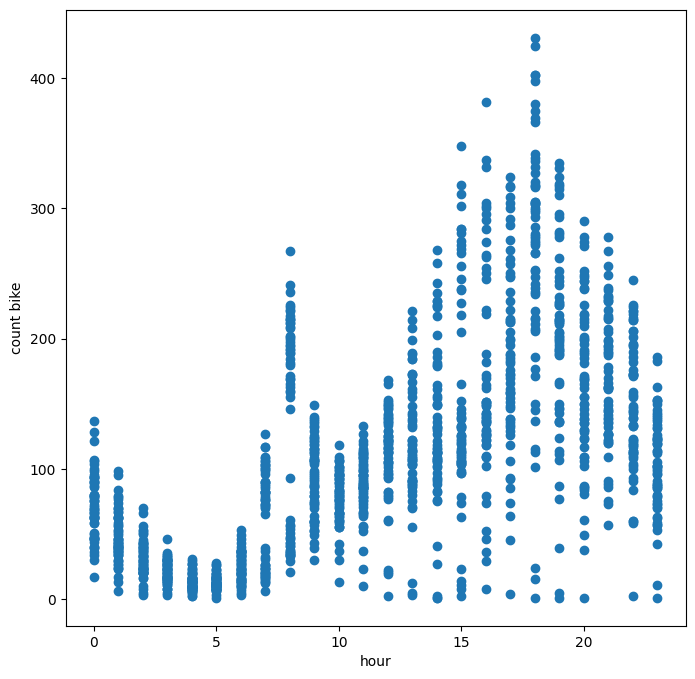

In [ ]:
import matplotlib.pyplot as plt


fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(111)
fig.set_facecolor('white')
plt.scatter(time, c_bike)
ax.set_xlabel('hour')
ax.set_ylabel('count bike')
plt.show()